In [1]:
#AutoRegressive Models
#Moving Average Models
#AutoRegressive Moving Average Models

In [2]:
#Volatility Clustering
    #volatility of an instrument is not constant in time
    #conditional heteroskedasticity
    #AR, MA and ARMA do not take into account volatility clustering

#Strict Stationarity
    #this is violated for many instruments 
    #distribution of the time series is unchanged for any shift in the time series

#Aikake Information Criterion
    #we will create a number of AR, MA, ARMA models of different orders of p and q 
    #We will use AIC to determine the best model
    #AIC = -2Log(L) + 2k where k is the # of parameters and L is the liklihood function

In [3]:
#AutoRegressive Models
    #linear
    #extension of random walks but instead of the dependence being on the last observation
    #the dependence is on an arbitrary number of time steps
    #Each time step gets its own coefficient
    #We can make predicitions upt to X_t+n time steps into the future

    #Stationarity 
    #Solve the characteristic equation
    #AR model written in BSO form set to zero
    #theta_p(B) = 0
    #For each of the variables in the equation that satisfies this constraint, 
    #they must exceed one in order to meet stationarity constrain


#Yule-Walker Equations
    #autocovariance and autocorrelation are defined by these two equations for AR Models

## AR1

In [12]:
#AR(1) process with alpha 0.6
set.seed(1)
x <- w <- rnorm(100)
for (t in 2:100) x[t] <- 0.6*x[t-1] + w[t]

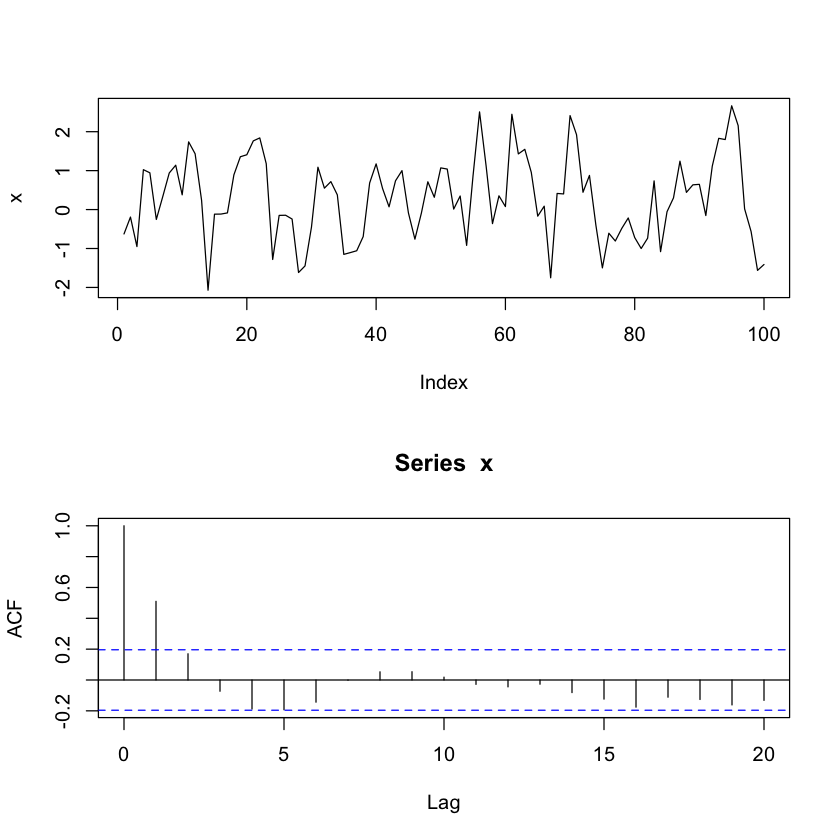

In [3]:
layout(1:2)
plot(x, type='l')
acf(x)

In [5]:
#ar in R will fit an autoregressive model with an MLE procedure 
x.ar <- ar(x, method='mle')
#The ar function can estimate what order our model is
x.ar$order

#This is lower than our 'true value'
x.ar$ar

#We can estimate what our alpha parameter is 
#we see that it falls within the 95% confidence interval
x.ar$ar + c(-1.96,1.96)*sqrt(x.ar$asy.var)

[1] 1

[1] 0.5231187

Warning message in c(-1.96, 1.96) * sqrt(x.ar$asy.var):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”

[1] 0.3556050 0.6906324

[1] 1

Warning message in c(-1.96, 1.96) * sqrt(x.ar$asy.var):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”

[1] -0.7538593 -0.4408353

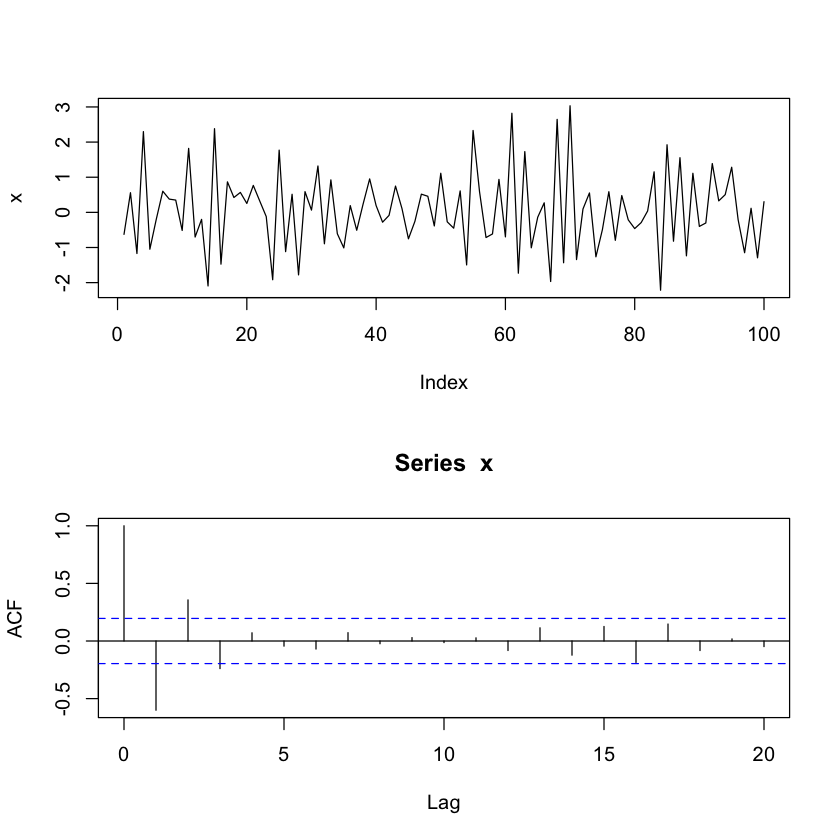

In [11]:
#What happens if we change our alpha param to -0.6
set.seed(1)
x <- w <- rnorm(100)
for (t in 2:100) x[t] <- -0.6*x[t-1] + w[t]
    
layout(1:2)
plot(x, type='l')
acf(x)
    
    
#lets fit our ar model with an mle estimator
x.ar <- ar(x, method = 'mle')

#let's get our estimated order
x.ar$order

#lets compute our 95% conf interval
x.ar$ar + c(-1.96,1.96)*sqrt(x.ar$asy.var)

## AR 2 

Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”

[1] 2

[1]  0.6922744 -0.3694348

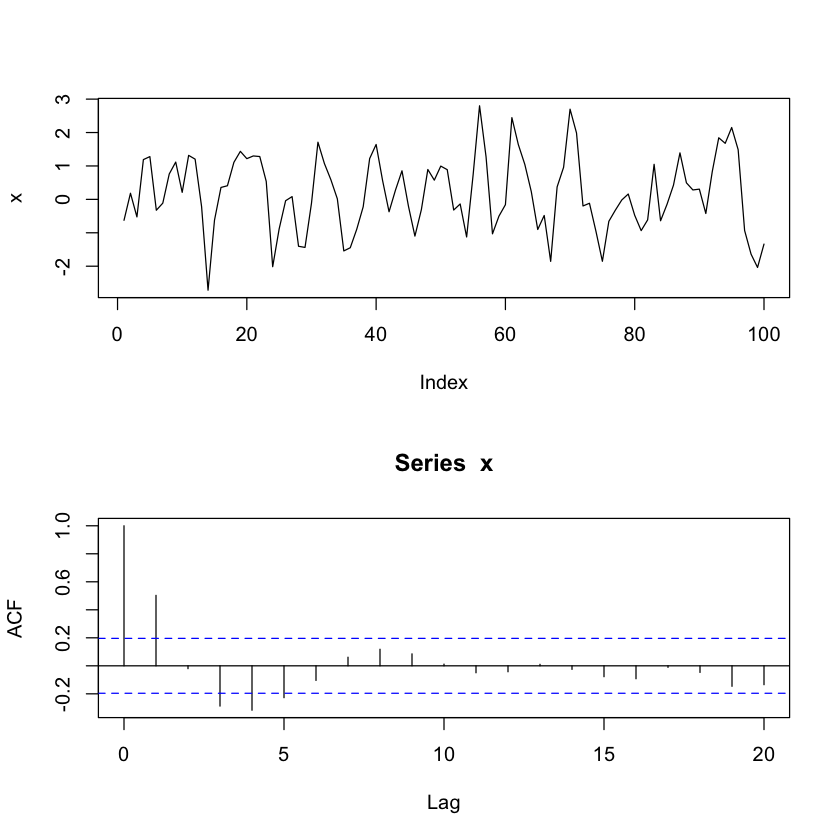

In [15]:
#What happens if we change our alpha param to -0.6
set.seed(1)
x <- w <- rnorm(100)
for (t in 3:100) x[t] <- 0.666*x[t-1] - 0.3*x[t-2] + w[t]
    
layout(1:2)
plot(x, type='l')
acf(x)
    
    
#lets fit our ar model with an mle estimator
x.ar <- ar(x, method = 'mle')

#let's get our estimated order
x.ar$order

#lets compute our 95% conf interval
x.ar$ar

In [19]:
#Lets look at a company
require(quantmod)
getSymbols('AMZN')

[1] "AMZN"

In [20]:
tail(AMZN)

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2017-12-21   1175.90   1179.17  1167.64    1174.76     2123100       1174.76
2017-12-22   1172.08   1174.62  1167.83    1168.36     1585100       1168.36
2017-12-26   1168.36   1178.32  1160.55    1176.76     2005200       1176.76
2017-12-27   1179.91   1187.29  1175.61    1182.26     1867200       1182.26
2017-12-28   1189.00   1190.10  1184.38    1186.10     1841700       1186.10
2017-12-29   1182.35   1184.00  1167.50    1169.47     2688400       1169.47

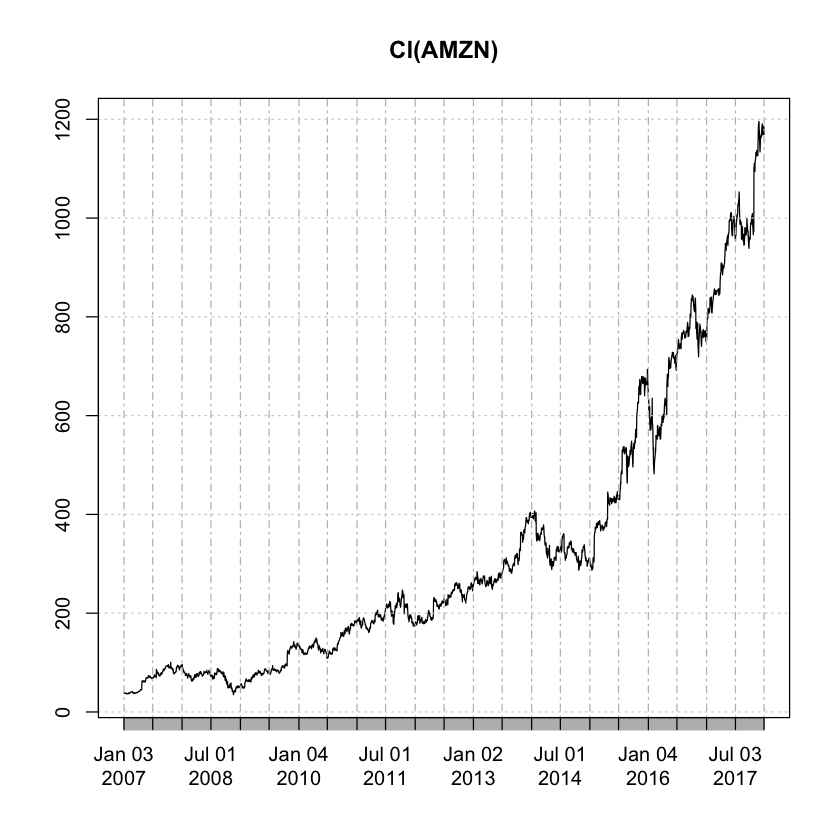

In [21]:
plot(Cl(AMZN))

In [22]:
amznrt <- diff(log(Cl(AMZN)))

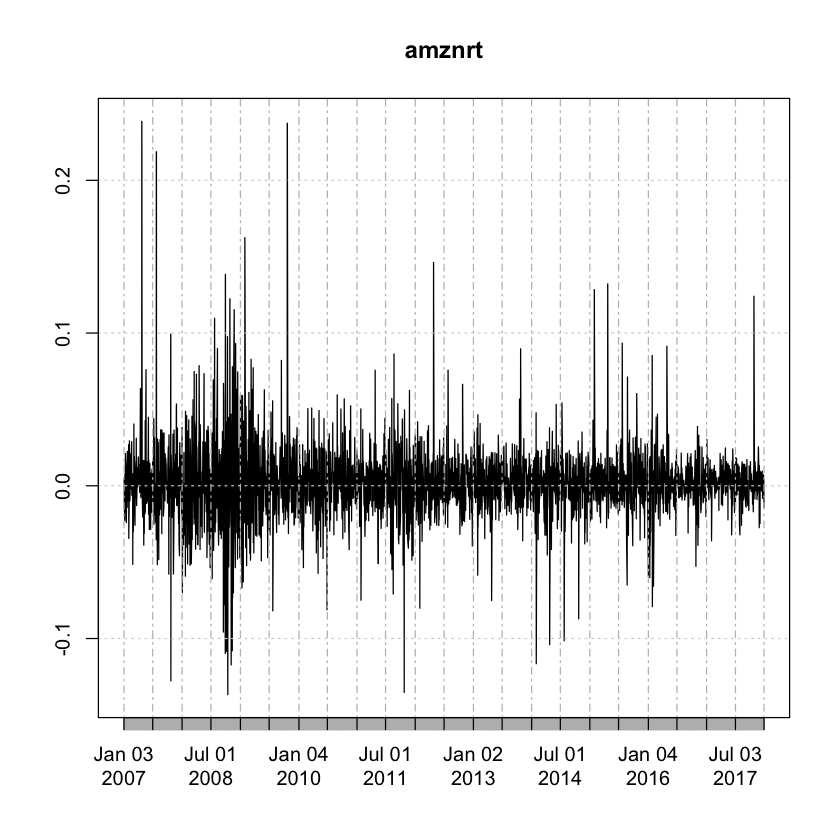

In [23]:
plot(amznrt)

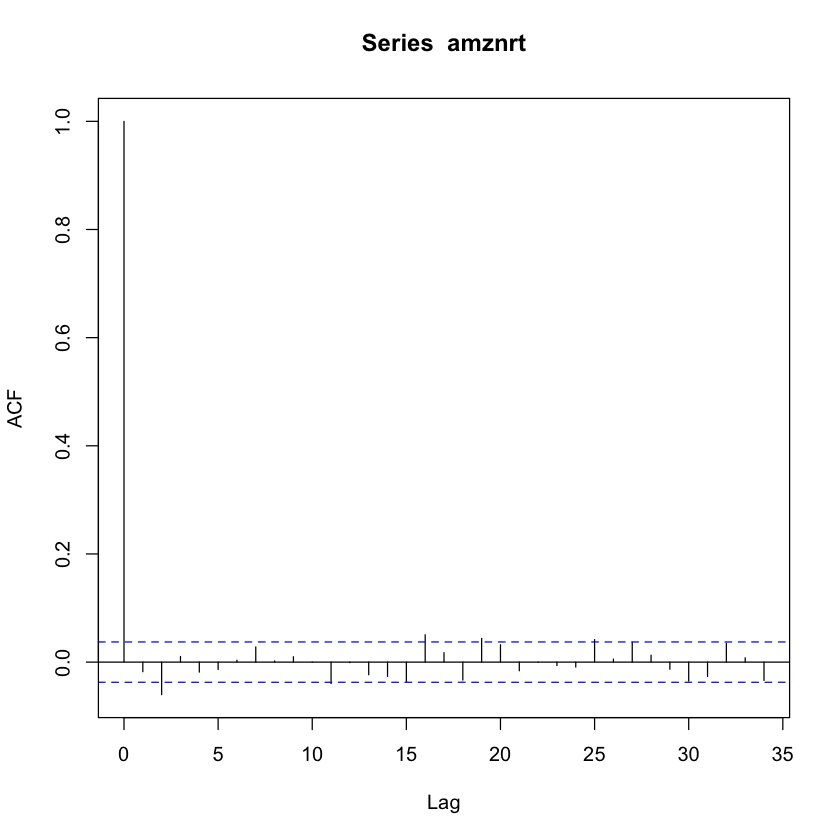

In [25]:
acf(amznrt, na.action=na.omit)

In [40]:
#lets apply the ar model to the 1st difference log
amznrt.ar <- ar(amznrt, na.action=na.omit)

#we can see what the estimated order of the series is
amznrt.ar$order

[1] 2

In [41]:
#now lets estimate what our two parameters are
amznrt.ar$ar

[1] -0.01887559 -0.06053727

In [39]:
#and now lets get a covariance matrix of our parameters
amznrt.ar$asy.var

3.603382e-04,6.413350e-06
6.413350e-06,3.603382e-04


In [43]:
#Now lets take the 95% cf around each param
#alpha_param1
-0.01888 + c(-1.96, 1.96)*sqrt(3.603e-4)

[1] -0.05608388  0.01832388

In [44]:
#alpha_param2
-0.061 + c(-1.96, 1.96)*sqrt(3.603e-4)

[1] -0.09820388 -0.02379612

In [45]:
#the takehome is that zero is within the cf and we cannot conclude 
#AR2 is an appropriate model for AMZN
#Autoregressive models do not take into account volatility clustering
#AR models believe variance is constant

In [47]:
#Lets look at the SP and see what the AR model tells us

getSymbols("^GSPC")
tail(GSPC)

[1] "GSPC"

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2017-12-21   2683.02   2692.64  2682.40    2684.57  3273390000       2684.57
2017-12-22   2684.22   2685.35  2678.13    2683.34  2399830000       2683.34
2017-12-26   2679.09   2682.74  2677.96    2680.50  1968780000       2680.50
2017-12-27   2682.10   2685.64  2678.91    2682.62  2202080000       2682.62
2017-12-28   2686.10   2687.66  2682.69    2687.54  2153330000       2687.54
2017-12-29   2689.15   2692.12  2673.61    2673.61  2443490000       2673.61

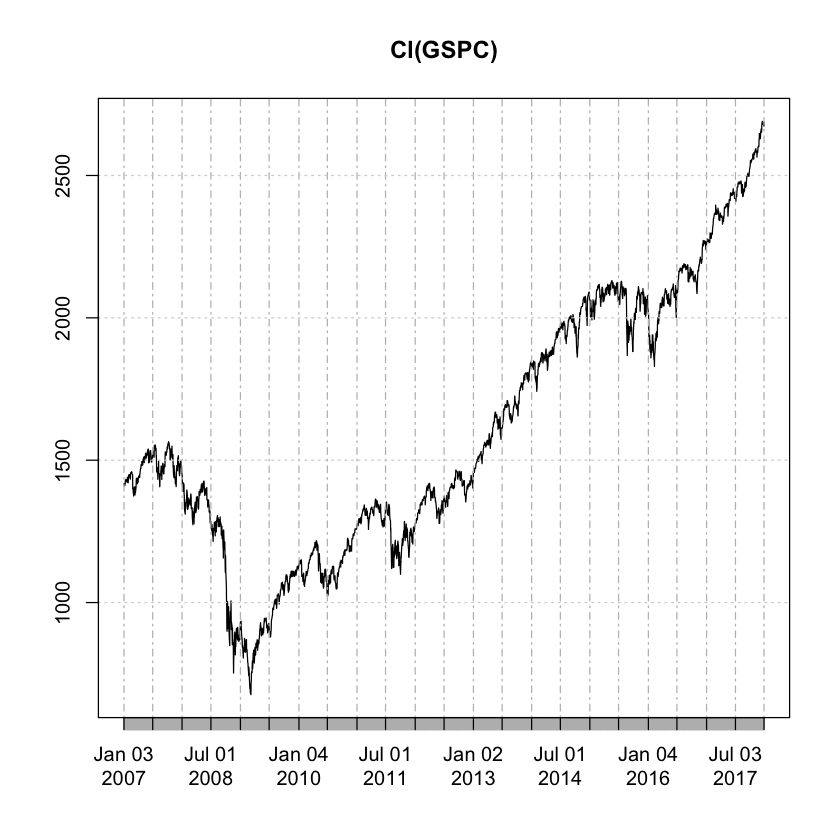

In [48]:
plot(Cl(GSPC))

In [49]:
gspcrt <- diff(log(Cl(GSPC)))

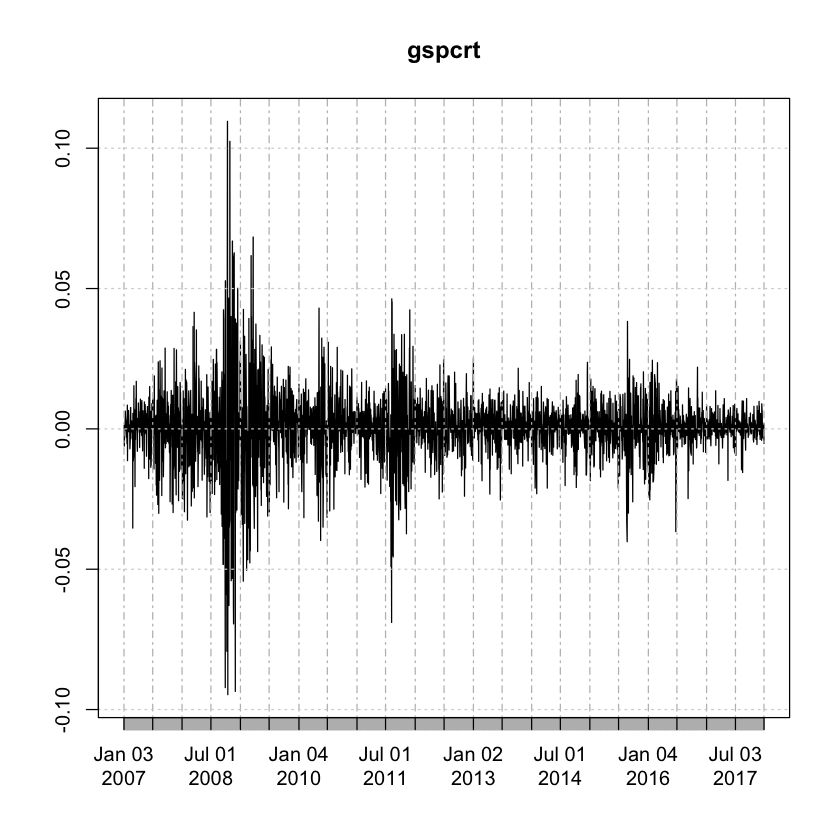

In [50]:
#we see highly volatile closing prices for this security
#it is unlikely that a simple ar model will characterize this security
plot(gspcrt)

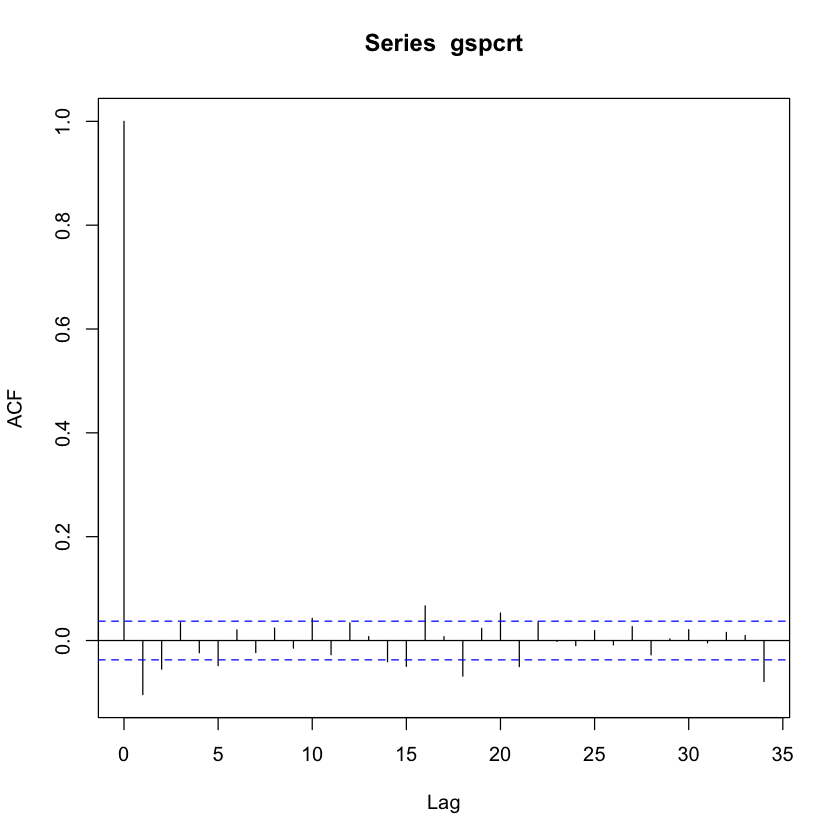

In [52]:
#With significant lags at multiple values of k
#A White noise Model does not fit as a potential data-generating process of this security
#We can see longer run lags that point to a longer term memory process
acf(gspcrt, na.action=na.omit)

In [54]:
#we can see that our ar model suggests this is an order 21 model 
#With 21 non-zero parameters
#This is much more complex than a lineary model 
gspcrt.ar <- ar(gspcrt, na.action=na.omit)
gspcrt.ar$order

[1] 21

## Moving average models of order q

In [56]:
#conditional heteroskedasticity, varying variance, volatility clustering
#Autoregressive models unable to represent the time series of data for financial assets
#This is due to the fact that variance changes over time
